In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [144]:
def plot_image(img):
    print(img.shape)
    plt.axis("off")
    plt.imshow(img)

(1024, 1280, 3)


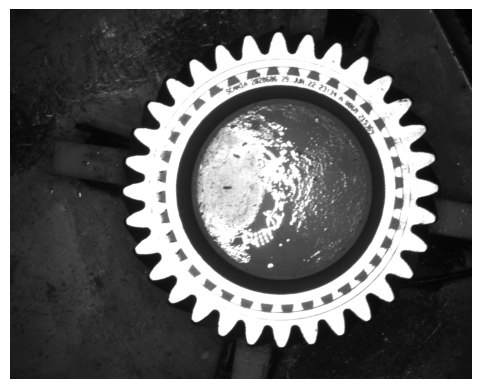

In [145]:
img = cv2.imread("Engranaje.bmp")
img2 = img.copy()
plot_image(img)

(1024, 1280)


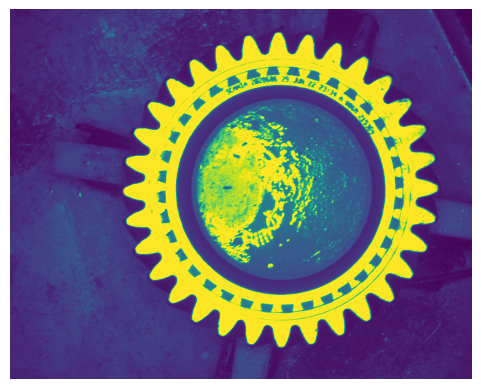

In [146]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot_image(gray)

(1024, 1280)


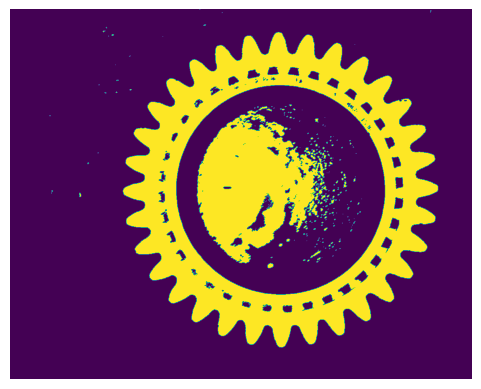

In [147]:
_,thresh = cv2.threshold(gray,110,255,cv2.THRESH_BINARY)
plot_image(thresh)

In [148]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

(1024, 1280, 3)


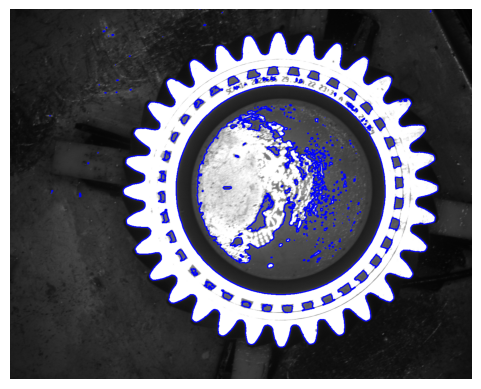

In [149]:
cv2.drawContours(img ,contours, -1, (0, 0, 255), 2)
plot_image(img)

El centroide del contorno más grande encontrado es: (748, 499)
[[741  64]]
[[740  65]]
[[738  65]]
[[737  66]]
[[736  66]]
[[732  70]]
[[732  71]]
[[731  72]]
[[731  73]]
[[730  74]]
[[730  75]]
[[729  76]]
[[729  77]]
[[728  78]]
[[728  79]]
[[727  80]]
[[727  81]]
[[726  82]]
[[726  86]]
[[724  88]]
[[724  89]]
[[723  90]]
[[723  92]]
[[722  93]]
[[722  95]]
[[721  96]]
[[721 101]]
[[720 102]]
[[720 106]]
[[719 107]]
[[719 109]]
[[718 110]]
[[718 114]]
[[717 115]]
[[717 118]]
[[716 119]]
[[716 120]]
[[715 121]]
[[715 122]]
[[714 123]]
[[713 123]]
[[712 124]]
[[711 124]]
[[710 125]]
[[709 125]]
[[708 126]]
[[704 126]]
[[703 125]]
[[700 125]]
[[698 123]]
[[697 123]]
[[695 121]]
[[695 120]]
[[693 118]]
[[693 117]]
[[692 116]]
[[692 115]]
[[691 114]]
[[691 113]]
[[690 112]]
[[690 111]]
[[689 110]]
[[689 109]]
[[687 107]]
[[687 105]]
[[686 104]]
[[686 102]]
[[684 100]]
[[684  98]]
[[682  96]]
[[682  95]]
[[681  94]]
[[681  92]]
[[680  91]]
[[680  90]]
[[678  88]]
[[678  87]]
[[676  85]]
[

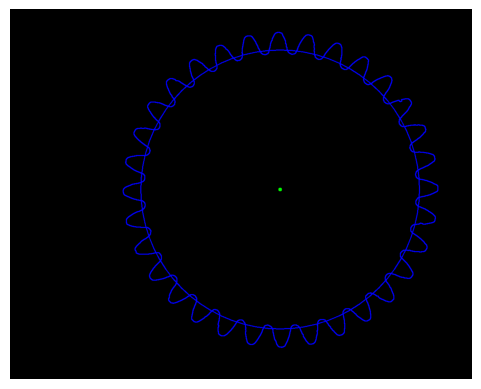

In [152]:
min_w = 650
max_w = 900
min_h = 750
max_h = 900
largest_area = 0
largest_contour = None

canvas = np.ones_like(img)

# Iterar sobre los contornos
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    
    # Condiciones para seleccionar candidatos
    if (max_w > w > min_w) and (max_h > h > min_h):
        # Encontrar el contorno más grande
        if area > largest_area:
            largest_area = area
            largest_contour = cnt

# Verificar que se encontró al menos un candidato
if largest_contour is not None:
    # Calcular el centroide del contorno más grande
    M = cv2.moments(largest_contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroid = (cx, cy)
        print("El centroide del contorno más grande encontrado es:", centroid)
        
        # Dibujar un punto en el centroide sobre canvas
        canvas = np.zeros_like(img)
        cv2.circle(canvas, (cx, cy), 5, (0,255, 0), -1)  # Dibuja un círculo rojo en el centroide
        
        # Dibujar el contorno más grande sobre canvas
        cv2.drawContours(canvas, [largest_contour], -1, (0, 0, 255), 2)

        
        # Calcular el radio del círculo
        dist_sum = 0
        num_points = 0
        for point in largest_contour:
            print(point)
            dist = np.sqrt((point[0][0] - cx)**2 + (point[0][1] - cy)**2)
            dist_sum += dist
            num_points += 1
        
        if num_points > 0:
            avg_dist = dist_sum / num_points
            radius = int(avg_dist*0.95)
            # Dibujar el círculo en el centroide con el radio calculado
            cv2.circle(canvas, (cx, cy), radius, (0, 0, 255), 2)  # Dibujar en color rojo con grosor 2

        # Mostrar la imagen resultante
        plot_image(canvas)
else:
    print("No se encontraron candidatos que cumplan con los criterios de tamaño.")
    print("No se encontró ningún centroide válido.")

In [154]:
import cv2
import numpy as np

# Dimensiones de las imágenes (aquí se puede ajustar según sea necesario)
width = 400
height = 400

# Crear una imagen en blanco para el círculo (fondo negro)
image1 = np.zeros((height, width, 3), dtype=np.uint8)

# Calcular el centro y radio del círculo
center = (width // 2, height // 2)
radius = min(width, height) // 4

# Dibujar un círculo negro en la imagen1
cv2.circle(image1, center, radius, (0, 0, 0), -1)  # -1 para rellenar el círculo

# Crear una imagen en blanco para el cuadrado (fondo negro)
image2 = np.zeros((height, width, 3), dtype=np.uint8)

# Calcular las coordenadas del cuadrado
x1, y1 = width // 4, height // 4
x2, y2 = 3 * width // 4, 3 * height // 4

# Dibujar un cuadrado blanco en la imagen2
cv2.rectangle(image2, (x1, y1), (x2, y2), (255, 255, 255), -1)  # -1 para rellenar el cuadrado

# Restar las dos imágenes
difference = cv2.add(image1, image2)

# Mostrar las imágenes originales y la diferencia
cv2.imshow('Círculo Negro', image1)
cv2.imshow('Cuadrado Blanco', image2)
cv2.imshow('Diferencia', difference)
cv2.waitKey(0)
cv2.destroyAllWindows()
